# Exploratory Data Analysis of Prosper Loan Data 
## by Liudmila Danilovskaya

## Preliminary Wrangling

In this project I will perform exploratory data analysis of the Prosper loan data. This dataset provides information about more than 100000 loans in the period of 2006-2014.

In [437]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [438]:
# load in the dataset into a pandas dataframe
df_loans = pd.read_csv('prosperLoanData.csv')

In [439]:
# high-level overview of data shape and composition
print(df_loans.shape)
df_loans.head(10)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [440]:
#create a copy of the original data before cleaning
df_loans_copy=df_loans.copy()

Let's drop columns which I will not investigate in this project.

In [441]:
#list of columns to drop
columns=['ListingNumber', 'ListingCreationDate', 'EstimatedReturn',
'ClosedDate', 'BorrowerAPR', 'LenderYield', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'EstimatedEffectiveYield',
'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'AmountDelinquent', 'PublicRecordsLast10Years'
,'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
'TradesOpenedLast6Months', 'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled'
, 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent',
'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'BorrowerState',
'LoanOriginationQuarter', 'MemberKey', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount',
'InvestmentFromFriendsAmount', 'Investors', 'ProsperRating (numeric)', 'CurrentDelinquencies', 'TotalInquiries'] 

In [442]:
#drop columns that are no needed in the exploration
df_loans_copy.drop(columns, axis=1, inplace=True)

In [443]:
#further drop columns starting with LP*
columns_LP=df_loans_copy.filter(regex=("LP.*")).columns
df_loans_copy.drop(columns_LP, axis=1,inplace=True)

In [444]:
#shape of the dataset after dropping columns
print(df_loans_copy.shape)

(113937, 23)


In [445]:
#types of the columns
df_loans_copy.dtypes

ListingKey                    object
CreditGrade                   object
Term                           int64
LoanStatus                    object
BorrowerRate                 float64
EstimatedLoss                float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
Occupation                    object
EmploymentStatus              object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
InquiriesLast6Months         float64
DelinquenciesLast7Years      float64
BankcardUtilization          float64
AvailableBankcardCredit      float64
DebtToIncomeRatio            float64
IncomeRange                   object
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
LoanOriginationDate           object
MonthlyLoanPayment           float64
dtype: object

In [446]:
#Convert LoanOriginationDate to datetime format.
df_loans_copy.LoanOriginationDate=pd.to_datetime(df_loans_copy.LoanOriginationDate)

In [447]:
# descriptive statistics for numeric variables
df_loans_copy.describe()

,Term,BorrowerRate,EstimatedLoss,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,InquiriesLast6Months,DelinquenciesLast7Years,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,113240.000000,112947.000000,106333.000000,106393.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.192764,0.080306,5.950067,2.774209,96.071582,1.435085,4.154984,0.561309,11210.225447,0.275947,5.608026e+03,8337.01385,272.475783
std,10.436212,0.074818,0.046764,2.376501,3.996797,94.480605,2.437507,10.160216,0.317918,19818.361309,0.551759,7.478497e+03,6245.80058,192.697812
min,12.000000,0.000000,0.004900,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,0.134000,0.042400,4.000000,1.000000,26.000000,0.000000,0.000000,0.310000,880.000000,0.140000,3.200333e+03,4000.00000,131.620000
50%,36.000000,0.184000,0.072400,6.000000,1.000000,67.000000,1.000000,0.000000,0.600000,4100.000000,0.220000,4.666667e+03,6500.00000,217.740000
75%,36.000000,0.250000,0.112000,8.000000,3.000000,137.000000,2.000000,3.000000,0.840000,13180.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,60.000000,0.497500,0.366000,11.000000,20.000000,755.000000,105.000000,99.000000,5.950000,646285.000000,10.010000,1.750003e+06,35000.00000,2251.510000


In [448]:
#function to replace the row values in specific column 
def new_values(data_frame, column_name, to_change):
    corrected_keys = to_change.keys()

    for k, v in to_change.items():
        data_frame.loc[data_frame['ListingCategory (numeric)'] == k, column_name] = v

In [449]:
#replace the numeric values of the column 'ListingCategory (numeric)' to descriptive names
corrected_value = {
    0: 'Not Available',
    1: 'Dept Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'CosmeticProcedure',
    11: 'EngagementRing',
    12: 'GreenLoans',
    13: 'HouseholdExpenses',
    14: 'LargePurchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'WeddingLoans'    
}
    
new_values(df_loans_copy, 'ListingCategory (numeric)', corrected_value)

In [450]:
# rename the columns
df_loans_copy.rename(columns={'ListingCategory (numeric)':'ListingCategory', 'ProsperRating (Alpha)':'ProsperRating'}, inplace=True)

In [451]:
#find unique values of 'LoanStatus' column
df_loans_copy.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [452]:
#change all values starting with 'Past Due*' to Past Due
df_loans_copy = df_loans_copy.replace(to_replace ='Past Due.*', value = 'Past Due', regex = True)

In [453]:
#display first 5 rows of the final cleaned dataset
df_loans_copy.head()

,ListingKey,CreditGrade,Term,LoanStatus,BorrowerRate,EstimatedLoss,ProsperRating,ProsperScore,ListingCategory,Occupation,...,InquiriesLast6Months,DelinquenciesLast7Years,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,1021339766868145413AB3B,C,36,Completed,0.1580,NaN,NaN,NaN,Not Available,Other,...,3.0,4.0,0.00,1500.0,0.17,"$25,000-49,999",3083.333333,9425,2007-09-12,330.43
1,10273602499503308B223C1,NaN,36,Current,0.0920,0.0249,A,7.0,Home Improvement,Professional,...,3.0,0.0,0.21,10266.0,0.18,"$50,000-74,999",6125.000000,10000,2014-03-03,318.93
2,0EE9337825851032864889A,HR,36,Completed,0.2750,NaN,NaN,NaN,Not Available,Other,...,0.0,0.0,NaN,NaN,0.06,Not displayed,2083.333333,3001,2007-01-17,123.32
3,0EF5356002482715299901A,NaN,36,Current,0.0974,0.0249,A,9.0,Motorcycle,Skilled Labor,...,0.0,14.0,0.04,30754.0,0.15,"$25,000-49,999",2875.000000,10000,2012-11-01,321.45
4,0F023589499656230C5E3E2,NaN,36,Current,0.2085,0.0925,D,4.0,Home Improvement,Executive,...,1.0,0.0,0.81,695.0,0.26,"$100,000+",9583.333333,15000,2013-09-20,563.97


### The structure of the dataset

There are 113937 listings in the dataset with 81 variables. After preliminary data wrangling the number of variables reduced to 24. 

### The main features of interest are:

I am most interested in figuring out what features are best in prediction borrower interest rate for the loan (BorrowerRate), prosper score and credit grade (the credit rating that was assigned at the time the listing went live).

The prosper score ranges from 1-10, with 10 being the best, or lower risk score. Applicable for loans generated after July 2009.

The credit grade ranges from NC (no credit) to AA (the best credit rating). Applicable for the loans generated before 2009.

### Other features in the dataset that will help to support investigation of the main features of interest:

I expect that:
- CreditGrade, LoanOriginalAmount, duration (Term), ListingCategory and year of loan origination have the strongest effect on the **BorrowerRate**. 
- EstimatedLoss (sum of the values of all possible losses, each multiplied by the probability of that loss occurring), StatedMonthlyIncome, DelinquenciesLast7years and DeptToIncomeRation will have the strongest effect on **ProsperScore**.
- EmploymentStatus, EmploymentStatusDuration, IncomeRange, StatedMonthlyIncome will have the strongest effect on **CreditGrade**.

## Univariate Exploration

I will start by looking at the distribution of the first variable of interest: BorrowerRate.

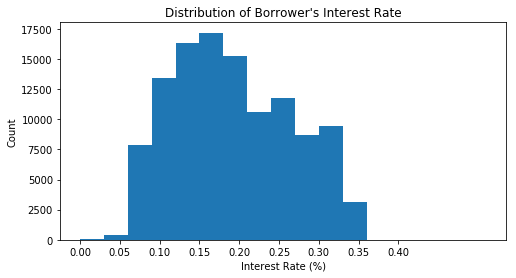

In [454]:
# univariate plot of borrower rate. Since it is a numeric variable, the histogram is created.
plt.figure(figsize = [8, 4])
bin_edges=np.arange(0, df_loans_copy['BorrowerRate'].max()+0.03,0.03)
plt.hist(data = df_loans_copy, x = 'BorrowerRate', bins=bin_edges)
#
plt.xlabel("Interest Rate (%)")
plt.ylabel('Count')
plt.title("Distribution of Borrower's Interest Rate");
plt.xticks(np.arange(0, 0.45, 0.05));

The distribution of the borrower interest rate is close to normal. The maximum interest rate is appr. 0.35%, while the most common interest rate is between 0.15 and 0.2%. 

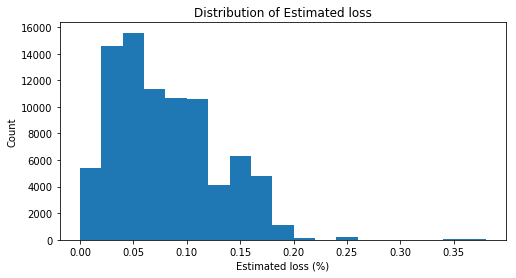

In [455]:
# univariate plot of estimated loss. Since it is a numeric variable, the histogram is created.
plt.figure(figsize = [8, 4])
bin_edges=np.arange(0, df_loans_copy['EstimatedLoss'].max()+0.02,0.02)
plt.hist(data = df_loans_copy, x = 'EstimatedLoss', bins=bin_edges)
plt.xlabel('Estimated loss (%)')
plt.ylabel('Count')
plt.title("Distribution of Estimated loss");

The distribution of estimated loss is right skewed. That means most of the loans have low estimation loss.

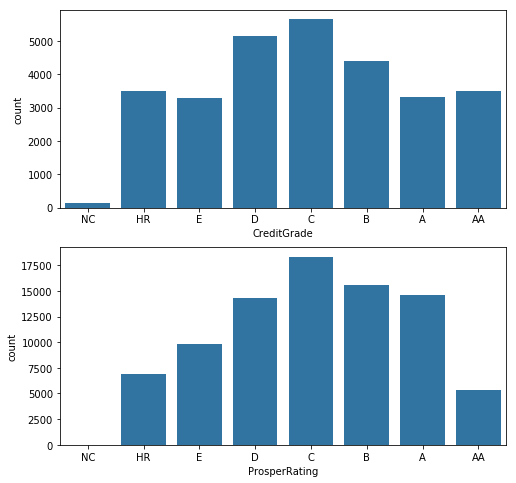

<Figure size 720x360 with 0 Axes>

In [456]:
## let's plot together the distribution of CreditGrade and ProsperRating.
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
level_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_loans_copy['CreditGrade'] = df_loans_copy['CreditGrade'].astype(ordered_cat)
df_loans_copy['ProsperRating'] = df_loans_copy['ProsperRating'].astype(ordered_cat)
sb.countplot(data = df_loans_copy, x = 'CreditGrade', color = base_color, ax = ax[0]);
sb.countplot(data = df_loans_copy, x = 'ProsperRating', color = base_color, ax = ax[1]);
plt.show();

The value 'NC' is very small, meaning only a small number of people didn't get their credit prior 2009. Most of the borrowers have a credit grade C. 

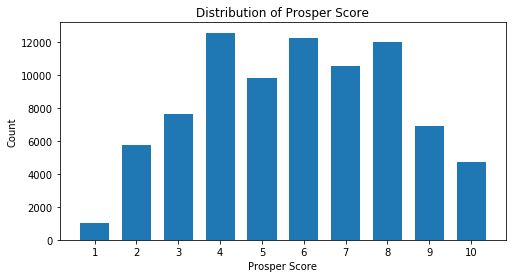

In [457]:
plt.figure(figsize = [8, 4])
bin_edges = np.arange(0.5, 10.5+1, 1)
plt.hist(data=df_loans_copy, x='ProsperScore',bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 10+1, 1))
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title("Distribution of Prosper Score");

In [458]:
df_loans_copy.ProsperScore.mean()

5.950066585742402

The distribution of ProsperScore is roughly normal. Prosper borrowers have on average prosper score 6.

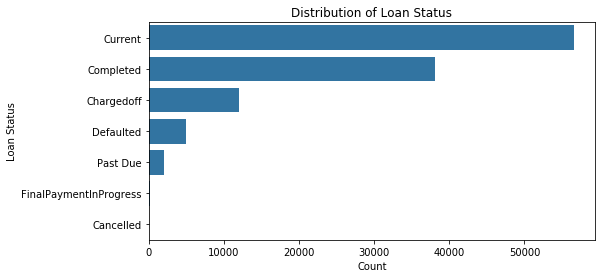

In [459]:
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]
loan_status_order = df_loans_copy['LoanStatus'].value_counts().index
sb.countplot(data = df_loans_copy, y = 'LoanStatus', color = base_color, order=loan_status_order)
plt.ylabel('Loan Status')
plt.xlabel('Count')
plt.title("Distribution of Loan Status");

Most of the loans are still current. Completed loans take second place. There is a small number of Past Due loans.

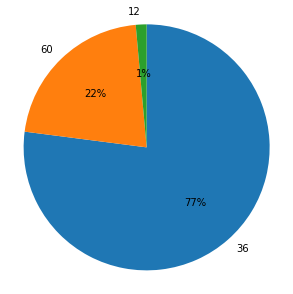

In [460]:
#let's plot the distribution of loan duration. 
plt.figure(figsize = [5, 5])
sorted_counts = df_loans_copy['Term'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.0f%%')
plt.axis('square');

The pie chart shows that the most common are 36-months loans. Only 1% of loans are 12-months loans.

In [461]:
#group LoanOriginationDate into years
bin_edges=pd.date_range('2005-11-15 00:00:00', freq='Y', periods=10)
bin_names=['2006', '2007','2008','2009','2010','2011', '2012','2013','2014']
df_loans_copy['Year']=pd.cut(df_loans_copy.LoanOriginationDate, bins=bin_edges, labels=bin_names)

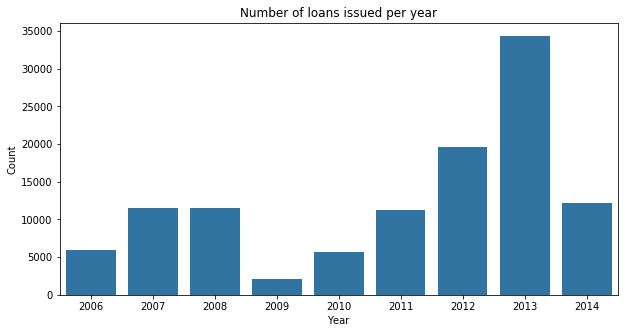

In [462]:
#let's count how many loans were issues per year
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_loans_copy, x = 'Year', color = base_color);
plt.xlabel('Year')
plt.ylabel('Count')
plt.title("Number of loans issued per year");

The number of loans issues in 2009 was the smallest. The reason for this is the financial crisis in 2008. Then, from the next year, it started to increase, reaching its peak in 2013, where about 35000 loans were issued.

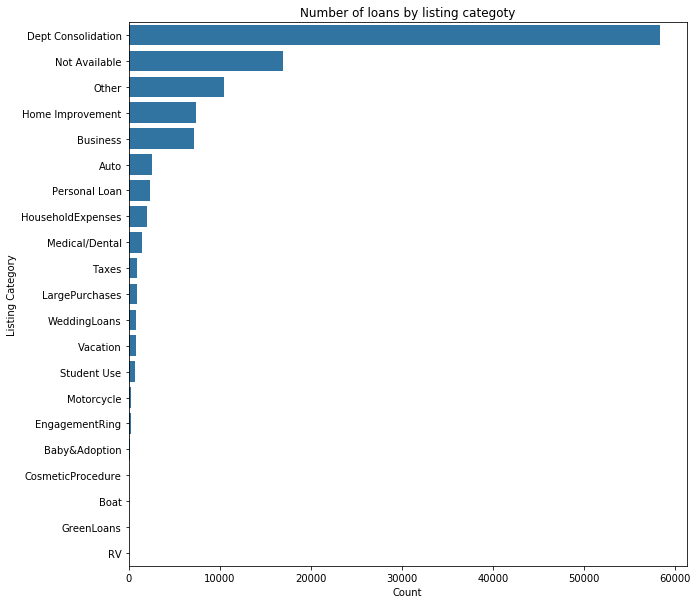

In [463]:
#let's plot the distribution of loans by listing category
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]
loan_status_order = df_loans_copy['ListingCategory'].value_counts().index
sb.countplot(data=df_loans_copy, y='ListingCategory', color = base_color, order=loan_status_order)
plt.xlabel('Count')
plt.ylabel('Listing Category')
plt.title("Number of loans by listing categoty");

Dept consolidation is the most common type of loan.

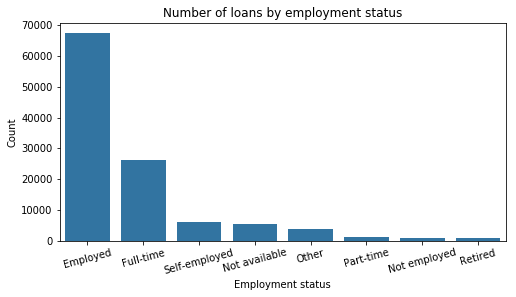

In [464]:
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]
loan_status_order = df_loans_copy['EmploymentStatus'].value_counts().index
sb.countplot(data = df_loans_copy, x = 'EmploymentStatus', color = base_color, order=loan_status_order)
plt.xticks(rotation=15);
plt.xlabel('Employment status')
plt.ylabel('Count')
plt.title("Number of loans by employment status");

Employed people , not surprisingly, have the highest number of loans. 

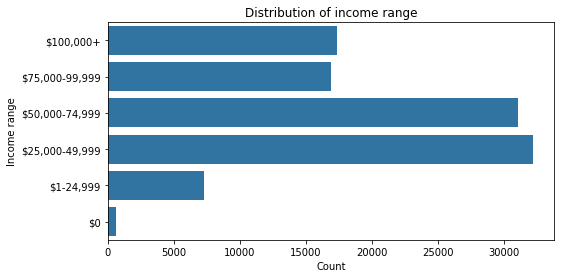

In [465]:
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]
level_order = ['$100,000+', '$75,000-99,999','$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_loans_copy['IncomeRange'] = df_loans_copy['IncomeRange'].astype(ordered_cat)
sb.countplot(data = df_loans_copy, y = 'IncomeRange', color = base_color);
plt.xlabel('Count')
plt.ylabel('Income range')
plt.title("Distribution of income range");

Most of borrowers earn between \\$25000-75000 per year. 

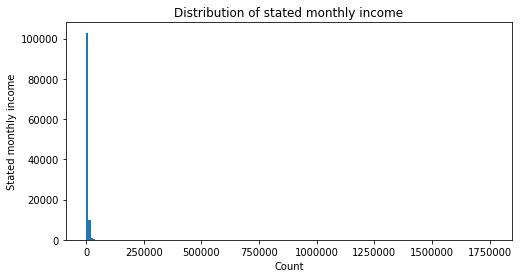

In [466]:
#let's plot the distribution of the stated monthly income
plt.figure(figsize = [8, 4])
bin_edges=np.arange(0, df_loans_copy['StatedMonthlyIncome'].max()+1e+4,1e+4)
plt.hist(data = df_loans_copy, x = 'StatedMonthlyIncome', bins=bin_edges);
plt.xlabel('Count')
plt.ylabel('Stated monthly income')
plt.title("Distribution of stated monthly income");

Since the distribution is highly skewed to the right, let's put it on a log scale instead.

In [467]:
np.log10(df_loans[df_loans_copy['StatedMonthlyIncome']>0].StatedMonthlyIncome.describe())

count    5.051318
mean     3.754156
std      3.874970
min     -1.079183
25%      3.517636
50%      3.672375
75%      3.834633
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

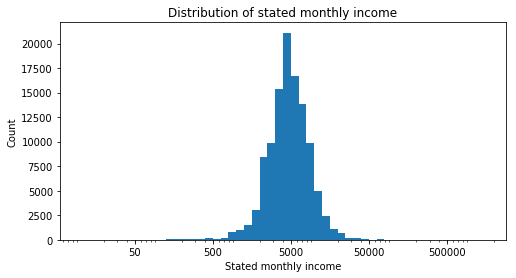

In [468]:
plt.figure(figsize = [8, 4])
bins=10 ** np.arange(1, 6.2+0.1,0.1)
ticks=[50, 500, 5000,50000,500000]
labels=['{}'.format(v) for v in ticks]
plt.hist(data = df_loans_copy, x = 'StatedMonthlyIncome', bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels);
plt.xlabel('Stated monthly income')
plt.ylabel('Count')
plt.title("Distribution of stated monthly income");

Stated monthly income has a long-tailed distribution, with most of borrowing having income on the low income end, and few on the high income end. When plotted on a log-scale, the monthly income distribution looks normal, with one peak of $5000. 

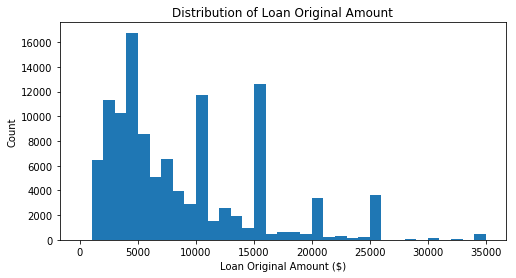

In [502]:
#let's plot the distribution of the stated monthly income
plt.figure(figsize = [8, 4])
bin_edges=np.arange(0, df_loans_copy['LoanOriginalAmount'].max()+1e+3,1e+3)
plt.hist(data = df_loans_copy, x = 'LoanOriginalAmount', bins=bin_edges);
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title("Distribution of Loan Original Amount");

In general, borrowers tend to take smaller loans, with the peak at \\$5000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The StatedMontlyIncome variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal, with one peak at $5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The values of the column ListingCategory (numeric) were changed from number to names. The column was further renamed to ListingCategory.

The year was extracted from LoanOriginationDate to plot distribution of loans each year.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

Let's find what affects the borrower rate.

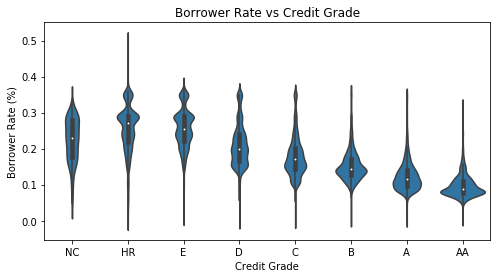

In [507]:
plt.figure(figsize = [8, 4])
level_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_loans_copy['CreditGrade'] = df_loans_copy['CreditGrade'].astype(ordered_cat)
base_color = sb.color_palette()[0]
sb.violinplot(data = df_loans_copy, x = 'CreditGrade', y = 'BorrowerRate', color=base_color)
plt.xlabel('Credit Grade')
plt.ylabel('Borrower Rate (%)')
plt.title("Borrower Rate vs Credit Grade");

The higher the credit score, the lower interest rate the borrower pays for the loan. Some bimodality is seen in credit grades HR, E and D. Credit grades B, A and AA are skewed to the right. The higher the credit grade the more data are clustered around the median.

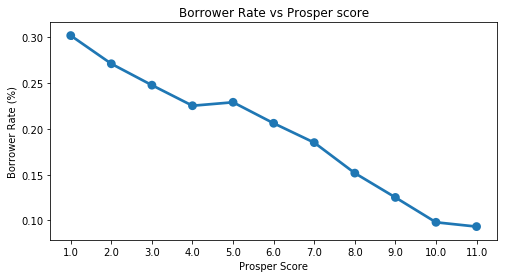

In [508]:
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]
sb.pointplot(data = df_loans_copy, x = 'ProsperScore', y = 'BorrowerRate', color=base_color)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower Rate (%)')
plt.title("Borrower Rate vs Prosper score");

The higher the prosper score the lower is the borrower rate

<Figure size 576x288 with 0 Axes>

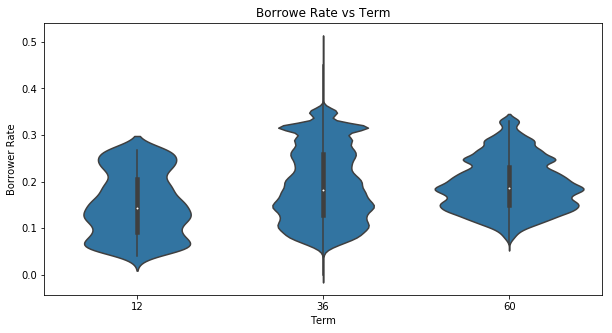

In [471]:
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
sb.violinplot(data = df_loans_copy, x = 'Term', y = 'BorrowerRate', color=base_color);
plt.xlabel('Term')
plt.ylabel('Borrower Rate')
plt.title("Borrowe Rate vs Term");

The median borrower's interest rate is increasing with increase of loan's term. 

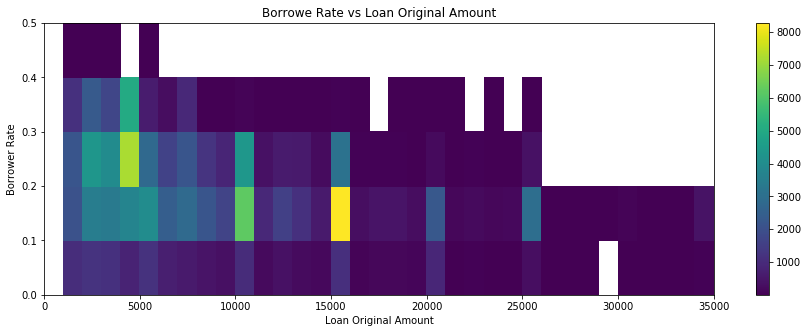

In [500]:
bins_x = np.arange(0, 35000+1000, 1000)
bins_y = np.arange(0, 0.5+0.1, 0.1)
plt.figure(figsize = [15, 5])
plt.hist2d(data = df_loans_copy, x = 'LoanOriginalAmount', y = 'BorrowerRate', bins = [bins_x, bins_y], cmin = 0.5);
plt.colorbar();
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.title("Borrowe Rate vs Loan Original Amount");

The heatmap shows that larger loan amounts have lower borrower rate (maximum 0.2%). For small loan amount the borrower rate varies but the typical rate is between 0.2-0.3%. Form medium loan sizes (about \\$15000) the most common borrower rate is 0.1-0.2%.

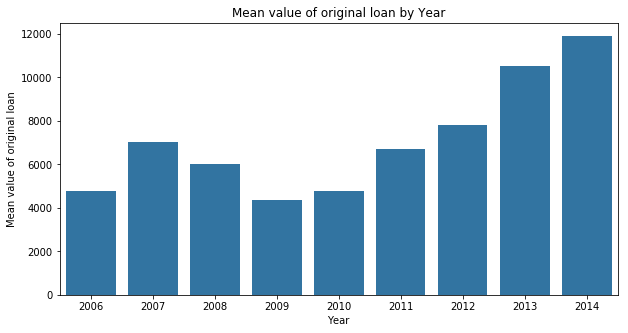

In [488]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
ct_counts=df_loans_copy.groupby('Year')['LoanOriginalAmount'].mean()
ct_counts=ct_counts.reset_index(name='LoanOriginalMean')
sb.barplot(x="Year", y="LoanOriginalMean", data=ct_counts, color=base_color);
plt.ylabel('Mean value of original loan')
plt.title("Mean value of original loan by Year");

In 2009 the loan amount was the lowest (at \\$4600) and started to rise sharply every year reaching \\$12000 in 2014. This is due to the Federal Reserve interest rate being at nearly 0%.

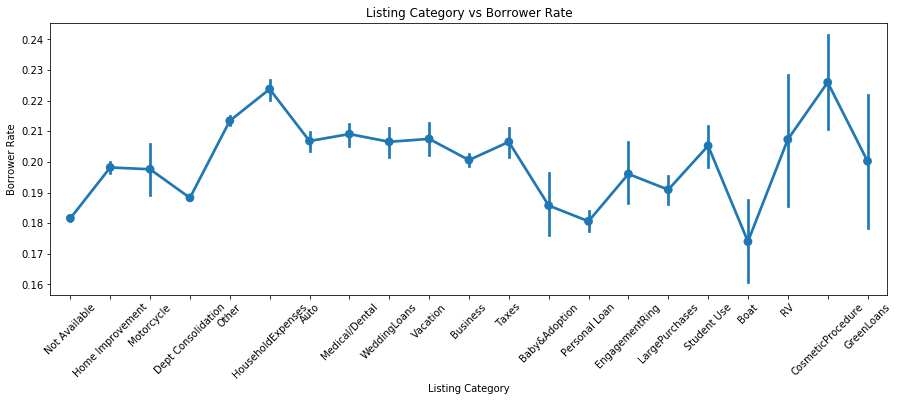

In [487]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
sb.pointplot(data = df_loans_copy, x = 'ListingCategory', y = 'BorrowerRate', color = base_color)
plt.xlabel('Listing Category')
plt.ylabel('Borrower Rate')
plt.title("Listing Category vs Borrower Rate")
plt.xticks(rotation=45);

Let's find what affects the prosper score.

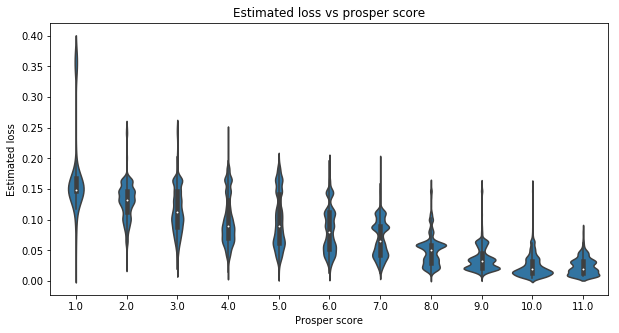

In [486]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = df_loans_copy, x = 'ProsperScore', y = 'EstimatedLoss', color = base_color);
plt.xlabel('Prosper score')
plt.ylabel('Estimated loss')
plt.title("Estimated loss vs prosper score");

The mean of the prosper score is increasing with the decrease of estimated loss. The higher the prosper score more values are clustered around the median.

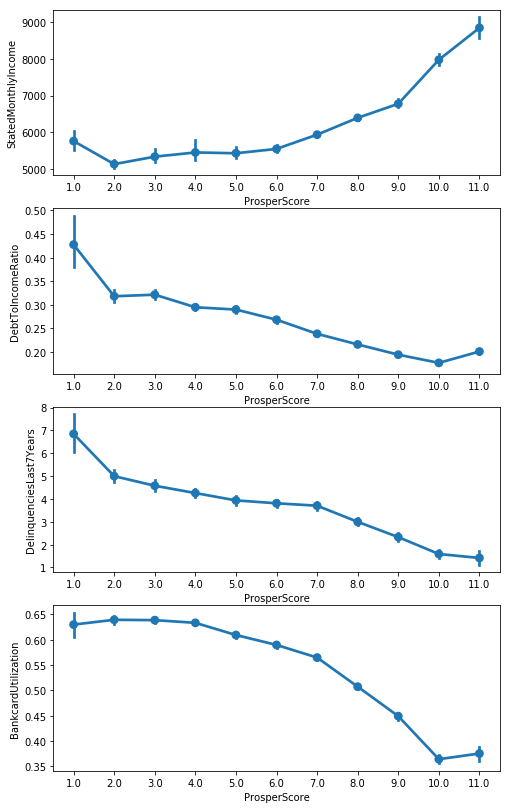

In [474]:
fig, ax = plt.subplots(nrows=4, figsize = [8,14])
sb.pointplot(data = df_loans_copy, x = 'ProsperScore', y = 'StatedMonthlyIncome', ax = ax[0])
sb.pointplot(data = df_loans_copy, x = 'ProsperScore', y = 'DebtToIncomeRatio', ax = ax[1])
sb.pointplot(data = df_loans_copy, x = 'ProsperScore', y = 'DelinquenciesLast7Years', ax = ax[2])
sb.pointplot(data = df_loans_copy, x = 'ProsperScore', y = 'BankcardUtilization',ax = ax[3])
plt.show()

Average prosper score increases with the decrease of dept to income ratio, deliquencies last 7 years and bank card utilization and increases with the stated monthly income.

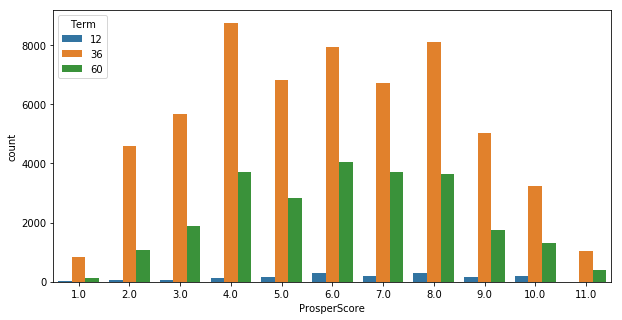

In [347]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df_loans_copy, x = 'ProsperScore', hue = 'Term');

Let's find what affects the credit score.

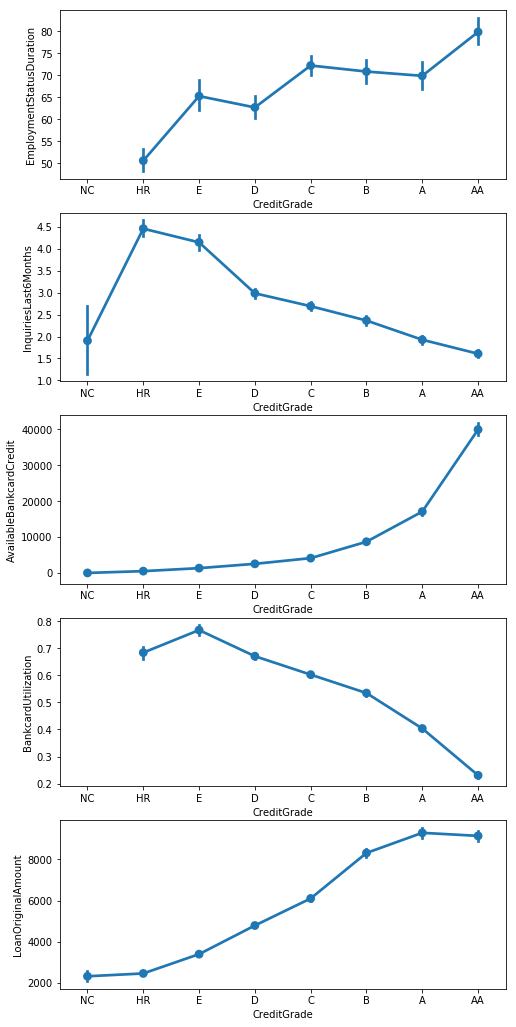

In [403]:
fig, ax = plt.subplots(nrows=5, figsize = [8,18])
level_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_loans_copy['CreditGrade'] = df_loans_copy['CreditGrade'].astype(ordered_cat)
sb.pointplot(data = df_loans_copy, x = 'CreditGrade', y = 'EmploymentStatusDuration', ax = ax[0])
sb.pointplot(data = df_loans_copy, x = 'CreditGrade', y = 'InquiriesLast6Months', ax = ax[1])
sb.pointplot(data = df_loans_copy, x = 'CreditGrade', y = 'AvailableBankcardCredit', ax = ax[2])
sb.pointplot(data = df_loans_copy, x = 'CreditGrade', y = 'BankcardUtilization', ax = ax[3])
sb.pointplot(data = df_loans, x = 'CreditGrade', y = 'LoanOriginalAmount', ax = ax[4])
plt.show();

- The higher available bankcard credit, the higher credit score. 
- The lower bankcard utilization the higher credit grade. Low bankcard utilization means only the small percentage of a borrower’s total available credit is currently being utilized.
- The smaller number of credit inquiries, the better is credit score. 
- By raising credit score the higher original loan amount can be approved.

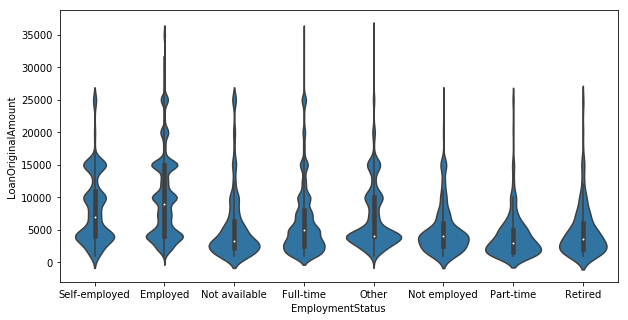

In [400]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 5])
sb.violinplot(data = df_loans_copy, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color=base_color);

Employed people usually have higher loan original amount.

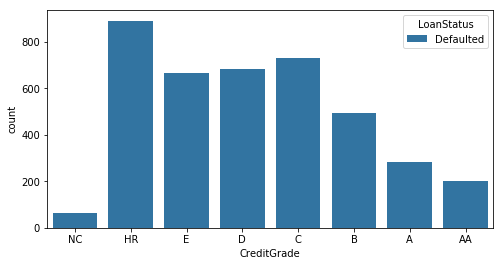

In [427]:
#sb.countplot(data = df_loans, x = 'CreditGrade', hue = 'LoanStatus', hue_order=['Defaulted'])
plt.figure(figsize = [8, 4])
level_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_loans['CreditGrade'] = df_loans_copy['CreditGrade'].astype(ordered_cat)
sb.countplot(data = df_loans_copy, x = 'CreditGrade', hue = 'LoanStatus', hue_order=['Defaulted']);

/Users/mila/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


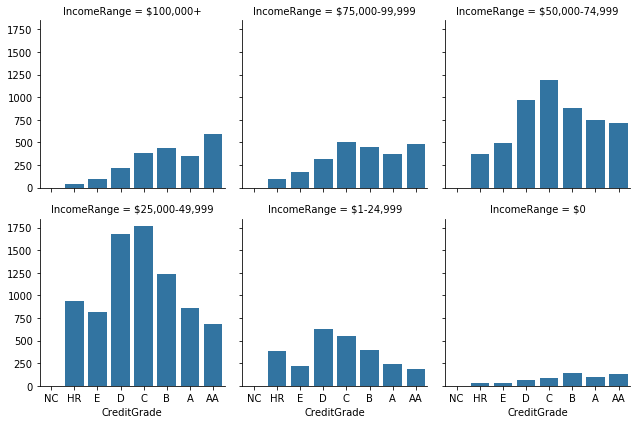

In [327]:
g = sb.FacetGrid(data = df_loans_copy, col = 'IncomeRange', col_wrap = 3)
g.map(sb.countplot, "CreditGrade");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Borrower rate is correlated to the credit grade, loan term and original loan amount. 

There was also an interesting relationship observed between credit grades and the categorical features. High credit grades are associated with increasing employment status duration, available bankcard credit and loan original amount and decreasing inquiries last 6 months and bankcard utilization. Borrowers who are full-time employed have much higher credit grades than those who are part-time employed. For defaulted loans most borrowers had low credit grades.

Another interesting relationship observed between prosper score and the categorical features. High prosper scores are associated with increasing stated month income and decreasing bankcard utilization, deliquncies last 7 years and dept to income ratio.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interesting relationship was found between the mean value of the original loan and the year of loan. In 2009 the loan amount was the lowest (at \\$4600) and started to rise sharply every year reaching \\$12000 in 2014. This is due to the Federal Reserve interest rate being at nearly 0%.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the fact that the property ownership influences the credit grade scores.

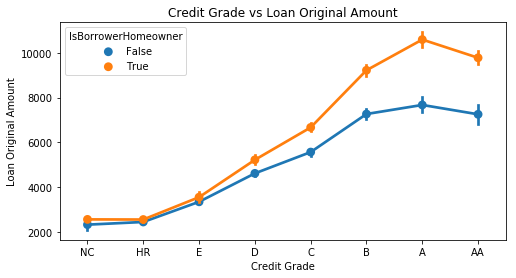

In [417]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 4])
sb.pointplot(data = df_loans_copy, x = 'CreditGrade', y = 'LoanOriginalAmount', hue='IsBorrowerHomeowner')
plt.xlabel('Credit Grade')
plt.ylabel('Loan Original Amount')
plt.title("Credit Grade vs Loan Original Amount");

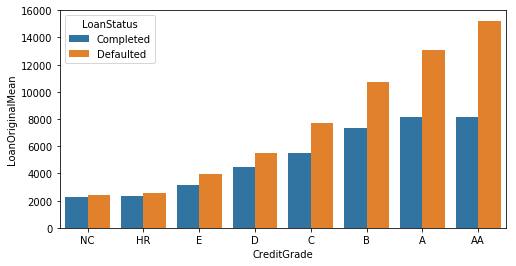

In [492]:
plt.figure(figsize = [8, 4])
data=df_loans_copy[df_loans_copy['LoanStatus'].isin(['Completed', 'Defaulted', 'Current', 'Past Due'])]
ct_counts=data.groupby(['CreditGrade','LoanStatus'])['LoanOriginalAmount'].mean()
ct_counts=ct_counts.reset_index(name='LoanOriginalMean')
ct_counts
sb.barplot(x="CreditGrade", y="LoanOriginalMean", hue="LoanStatus", data=ct_counts);

There was always more defaulted than completed loans for each credit grade before 2009.

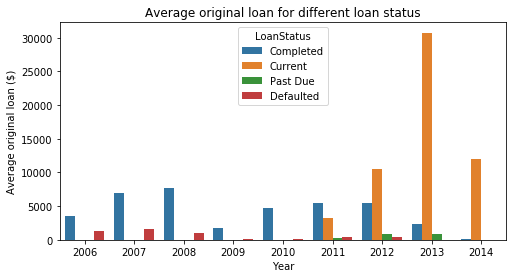

In [501]:
#let's count how many loans were issues per year
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]
data=df_loans_copy[df_loans_copy['LoanStatus'].isin(['Completed', 'Defaulted', 'Current', 'Past Due'])]
ct_counts=data.groupby(['CreditGrade','LoanStatus'])['LoanOriginalAmount'].mean()
ct_counts=ct_counts.reset_index(name='LoanOriginalMean')
sb.countplot(data = data, x = 'Year', hue="LoanStatus");
plt.xlabel('Year')
plt.ylabel('Average original loan ($)')
plt.title("Average original loan for different loan status");

The loans originated before 2009 were either completed or defaulted. After 2009 only a small number of loans were defaulted. The number of current loans increased significantly reaching its peak in 2013.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Multivariate exploration showed that property ownership strengthens the loan original amount.

### Were there any interesting or surprising interactions between features?

Surprisingly, defaulted loans had higher average original loan amount for all credit grades.